In [1]:
import os
import earthaccess
import rasters as rt
from EMITL2ARFL import *

date range

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

download directory

In [3]:
download_directory = "~/data/EMIT_download"

example spatial area

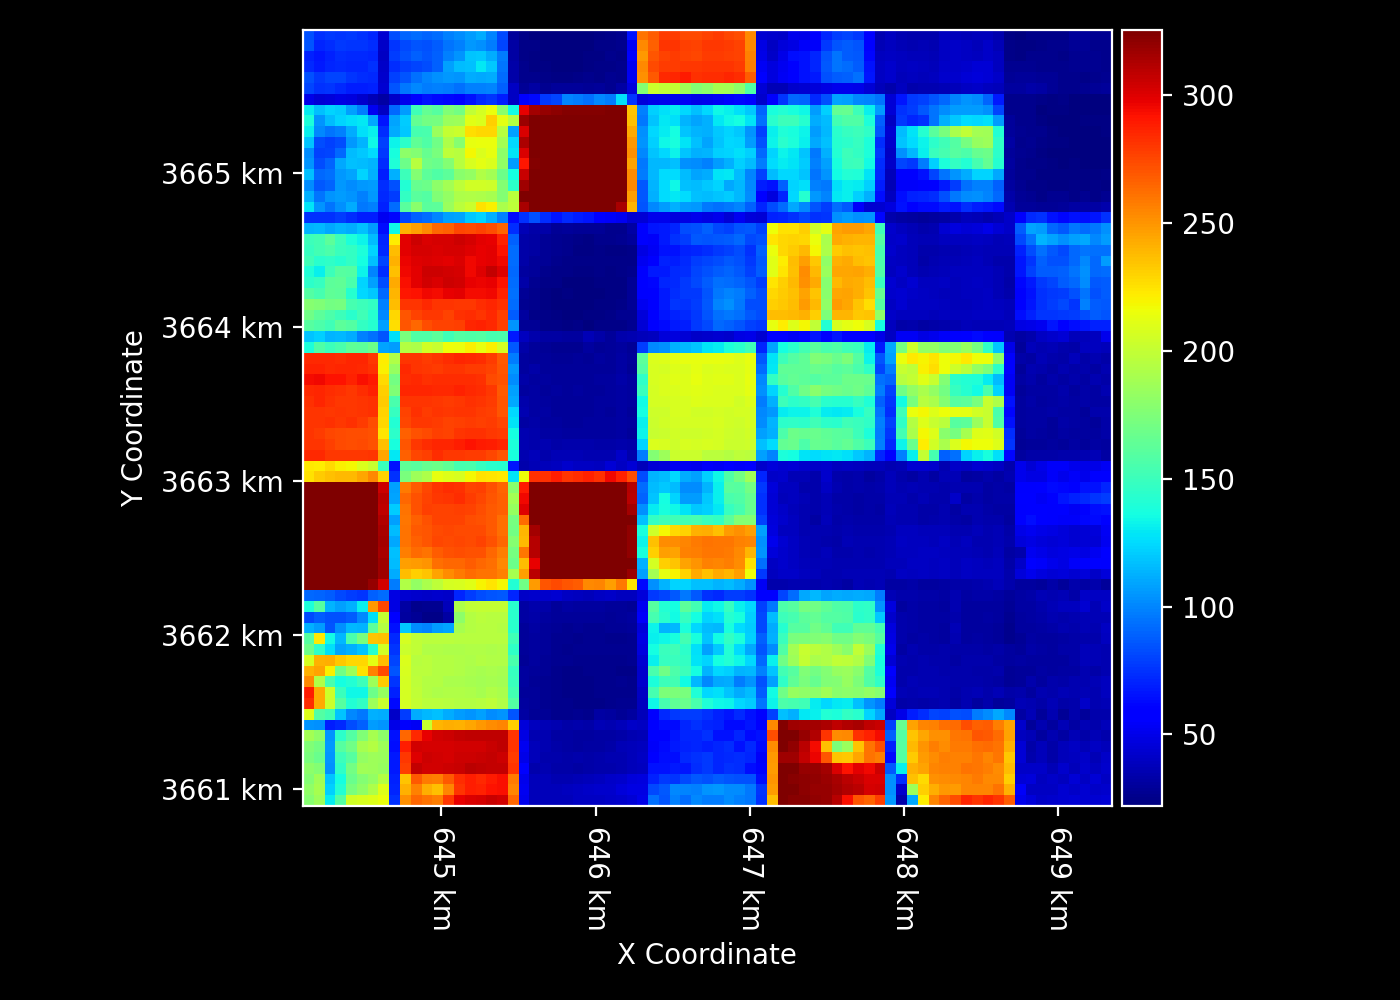

In [4]:
notebook_dir = os.path.dirname(os.path.abspath("Searching EMIT L2A Reflectance with earthaccess.ipynb"))
filename = os.path.join(notebook_dir, "farms_subset.tif")
subset = rt.Raster.open(filename)
subset

In [5]:
geometry = subset.geometry
geometry

{
  "dimensions": {
    "rows": 72,
    "cols": 75
  },
  "bbox": {
    "xmin": 644100.0,
    "ymin": 3660890.0,
    "xmax": 649350.0,
    "ymax": 3665930.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [6]:
earthaccess.login(strategy="netrc", persist=True)

retrieve example granule for orbit 2428011 scene 4

In [7]:
remote_granule = find_EMIT_L2A_RFL_granule(orbit=2428011, scene=4)
remote_granule

Collection: {'ShortName': 'EMITL2ARFL', 'Version': '001'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -115.20806884765625, 'Latitude': 33.48579788208008}, {'Longitude': -115.94625854492188, 'Latitude': 32.86580276489258}, {'Longitude': -115.43905639648438, 'Latitude': 32.26191329956055}, {'Longitude': -114.70086669921875, 'Latitude': 32.88190841674805}, {'Longitude': -115.20806884765625, 'Latitude': 33.48579788208008}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-10-06T16:52:00Z', 'EndingDateTime': '2024-10-06T16:52:12Z'}}
Size(MB): 3579.1394634246826
Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc']

In [8]:
import posixpath

[posixpath.basename(URL) for URL in remote_granule.data_links()]

['EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc',
 'EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc',
 'EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc']

In [9]:
granule = retrieve_EMIT_L2A_RFL_granule(orbit=2428011, scene=4, download_directory=download_directory)
granule

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL(directory="~/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004")

In [10]:
granule.files

['/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc',
 '/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc']

In [11]:
granule.directory

'~/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004'

In [12]:
granule.reflectance_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc'

In [13]:
granule.mask_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc'

In [14]:
granule.uncertainty_filename

'/Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc'

In [15]:
import netCDF4

def print_netcdf_tree(filename, indent=0, group=None):
    """
    Recursively prints the structure of a NetCDF file as a tree.
    """
    if group is None:
        ds = netCDF4.Dataset(filename, 'r')
        group = ds
        print(f"File: {filename}")
    else:
        ds = group

    prefix = "  " * indent
    # Print dimensions
    if ds.dimensions:
        print(f"{prefix}Dimensions:")
        for dim_name, dim in ds.dimensions.items():
            print(f"{prefix}  {dim_name}: size={len(dim)}")

    # Print variables
    if ds.variables:
        print(f"{prefix}Variables:")
        for var_name, var in ds.variables.items():
            print(f"{prefix}  {var_name}: shape={var.shape}, dtype={var.dtype}")

    # Print attributes
    if ds.ncattrs():
        print(f"{prefix}Attributes:")
        for attr in ds.ncattrs():
            print(f"{prefix}  {attr}: {getattr(ds, attr)}")

    # Print subgroups
    if hasattr(ds, 'groups') and ds.groups:
        print(f"{prefix}Groups:")
        for group_name, subgroup in ds.groups.items():
            print(f"{prefix}  Group: {group_name}")
            print_netcdf_tree(filename, indent + 2, subgroup)

    if indent == 0:
        ds.close()

# Example usage:
print_netcdf_tree(granule.reflectance_filename)

File: /Users/gregoryhalverson/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc
Dimensions:
  downtrack: size=1280
  crosstrack: size=1242
  bands: size=285
  ortho_y: size=1886
  ortho_x: size=2298
Variables:
  reflectance: shape=(1280, 1242, 285), dtype=float32
Attributes:
  ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
  summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust s

In [16]:
granule.lat

masked_array(
  data=[[32.36434892, 32.3647393 , 32.36512884, ..., 32.86453239,
         32.86496081, 32.86528579],
        [32.36475716, 32.36514961, 32.36554116, ..., 32.86494152,
         32.86536991, 32.86569489],
        [32.36516717, 32.365548  , 32.36594351, ..., 32.8653502 ,
         32.86577858, 32.86610355],
        ...,
        [32.88108829, 32.88148351, 32.8818764 , ..., 33.38430325,
         33.38473381, 33.38506026],
        [32.88149517, 32.88188519, 32.88227799, ..., 33.38470892,
         33.38513946, 33.38546591],
        [32.88190213, 32.88229291, 32.88268273, ..., 33.38511452,
         33.38554502, 33.38587144]],
  mask=False,
  fill_value=1e+20)

In [17]:
granule.lon

masked_array(
  data=[[-115.32255289, -115.32307871, -115.32360447, ..., -115.94496034,
         -115.94545073, -115.94582492],
        [-115.32206899, -115.32259455, -115.32312005, ..., -115.94447963,
         -115.94496867, -115.94534267],
        [-115.32158533, -115.32211235, -115.32263735, ..., -115.94399904,
         -115.94448684, -115.94486096],
        ...,
        [-114.70183811, -114.7023637 , -114.70288943, ..., -115.32356375,
         -115.3240578 , -115.32442875],
        [-114.70134838, -114.70187466, -114.7024004 , ..., -115.32307504,
         -115.32356822, -115.32393925],
        [-114.70085863, -114.70138481, -114.70191095, ..., -115.32258349,
         -115.3230751 , -115.32344472]],
  mask=False,
  fill_value=1e+20)

In [18]:
granule_geolocation = granule.geolocation
granule_geolocation

{
  "dimensions": {
    "rows": 1280,
    "cols": 1242
  },
  "bbox": {
    "xmin": -115.94582492488284,
    "ymin": 32.364348920758175,
    "xmax": -114.70085862896588,
    "ymax": 33.385871437632986
  },
  "crs": "EPSG:4326",
  "resolution": {
    "cell_width": 0.0006331268791953276,
    "cell_height": -0.0006331268791953276
  }
}

In [19]:
subset_grid = subset.geometry
subset_grid

{
  "dimensions": {
    "rows": 72,
    "cols": 75
  },
  "bbox": {
    "xmin": 644100.0,
    "ymin": 3660890.0,
    "xmax": 649350.0,
    "ymax": 3665930.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [20]:
granule_geolocation.index(subset_grid)

masked_array(
  data=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  mask=False,
  fill_value=True)

In [21]:
window = granule_geolocation.window(subset_grid)
window

Window(col_off=943, row_off=768, width=113, height=115)

In [22]:
type(window)

rasterio.windows.Window

In [23]:
GLT = granule.GLT()
GLT

GLT([[[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]],

     [[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]],

     [[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]],

     ...,

     [[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]],

     [[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]],

     [[0, 0],
      [0, 0],
      [0, 0],
      ...,
      [0, 0],
      [0, 0],
      [0, 0]]], shape=(1886, 2298, 2))

In [24]:
type(GLT)

EMITL2ARFL.GLT.GLT

In [25]:
GLT.geolocation

{
  "dimensions": {
    "rows": 1280,
    "cols": 1242
  },
  "bbox": {
    "xmin": -115.94582492488284,
    "ymin": 32.364348920758175,
    "xmax": -114.70085862896588,
    "ymax": 33.385871437632986
  },
  "crs": "EPSG:4326",
  "resolution": {
    "cell_width": 0.0006331268791953276,
    "cell_height": -0.0006331268791953276
  }
}

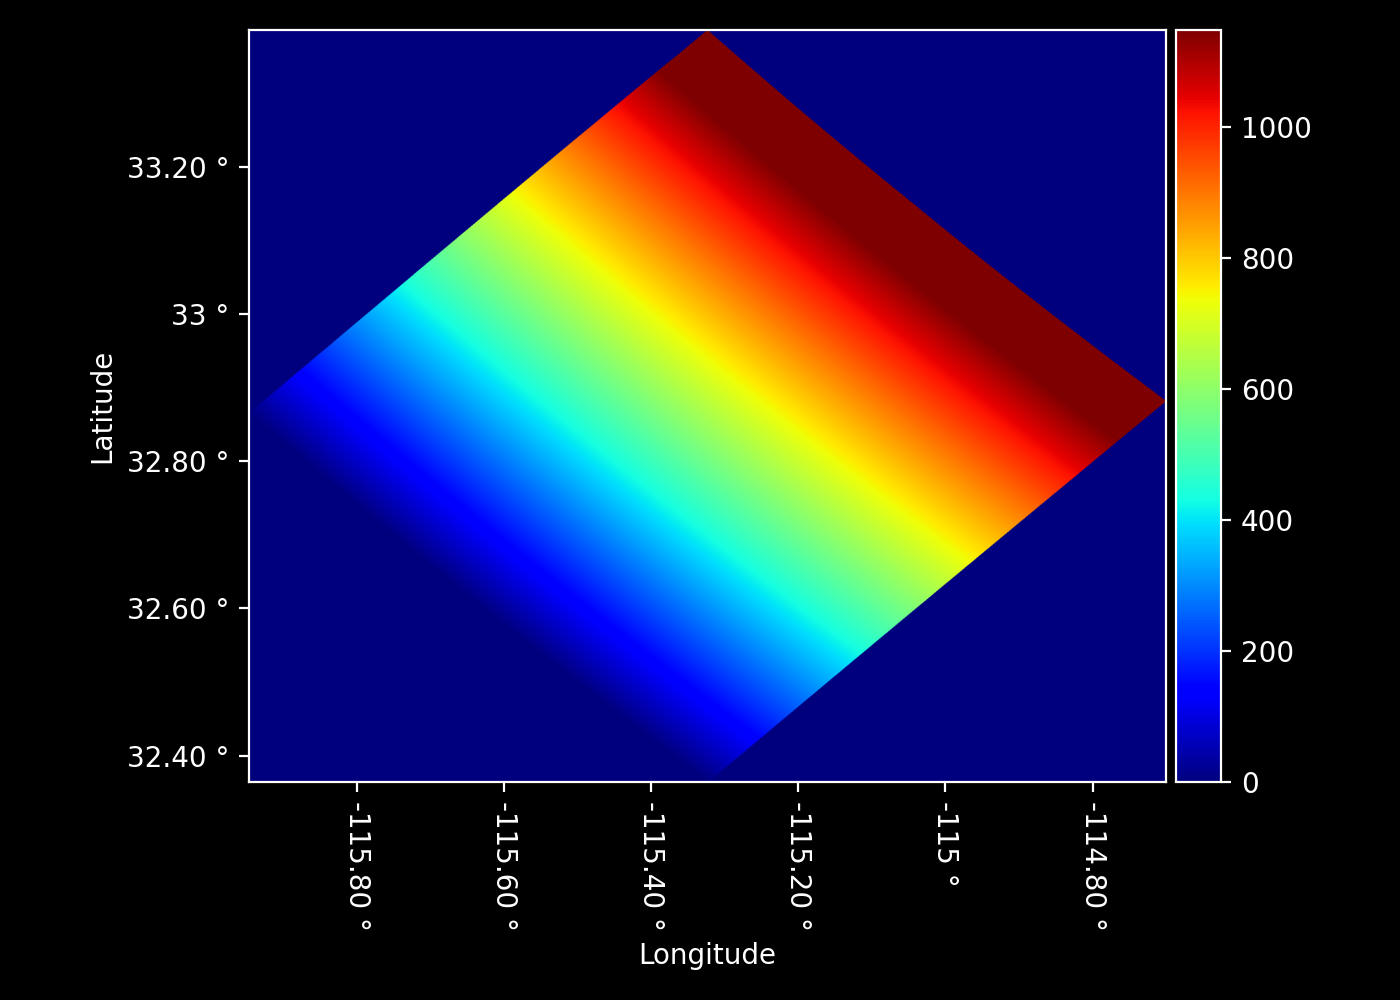

In [26]:
GLT.rows

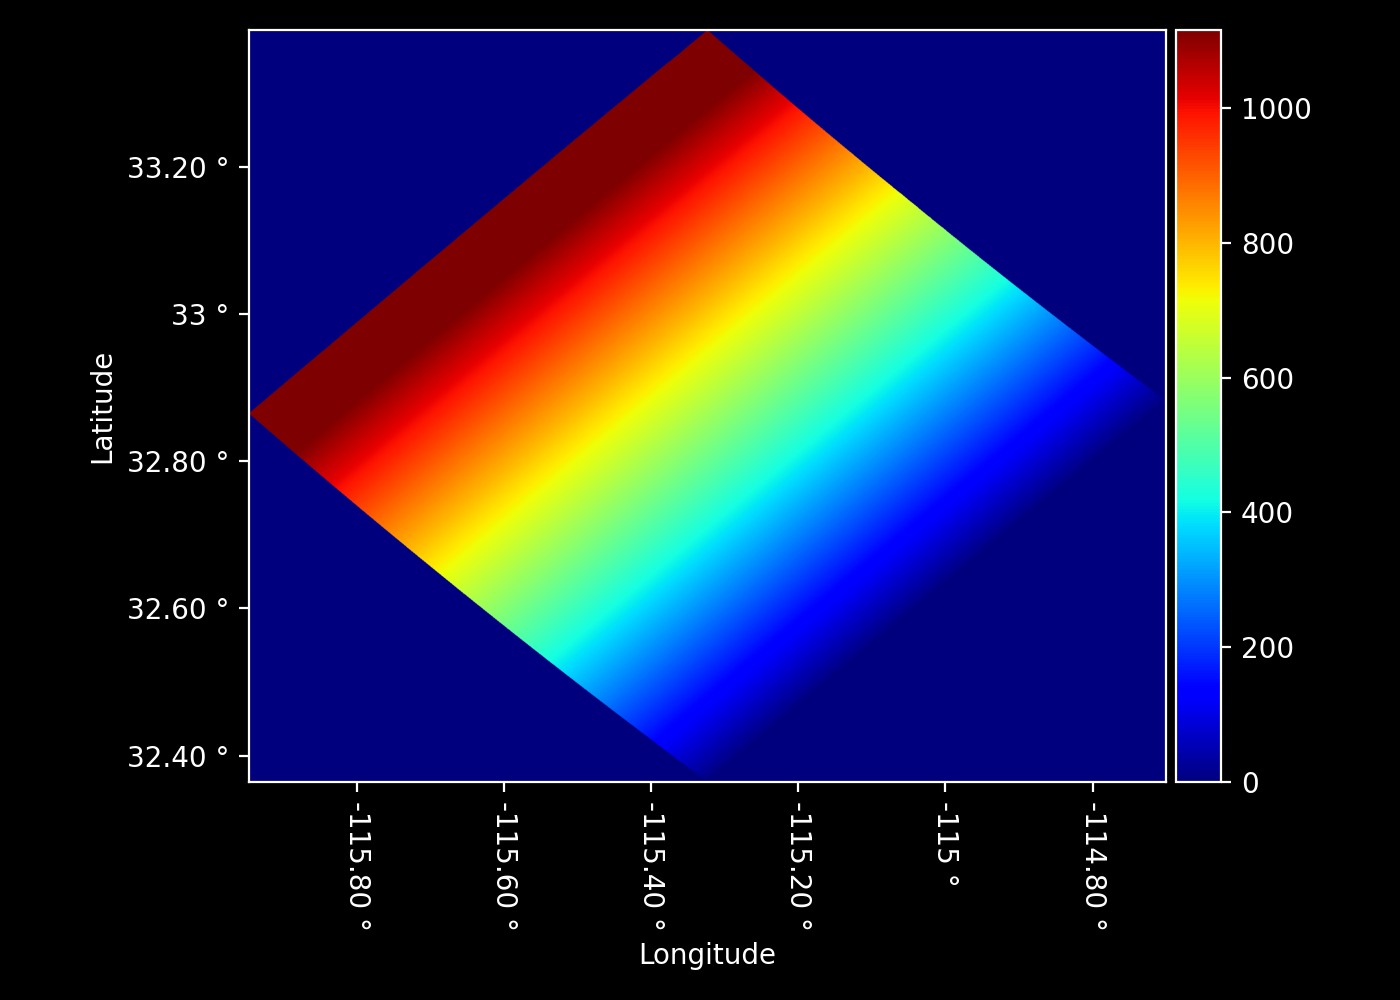

In [27]:
GLT.cols